<a href="https://colab.research.google.com/github/DennisGabriel-Dev/trabalho-final-AM/blob/main/Trabalho_Final_Aprendizado_de_M%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando a base de dados

# 1. Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# 2. Carregamento dos dados

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

# 3. Análise exploratória inicial

In [4]:
print(df.head())
print(df.info())
print(df['y'].value_counts())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

# 4. Pré-processamento

# 4.1 Remover a coluna 'duration' (não pode ser usada para predição realista)

In [5]:
df = df.drop('duration', axis=1)

# 4.2 Separar features e target

In [6]:
X = df.drop('y', axis=1)
y = df['y'].map({'yes': 1, 'no': 0})  # binarizando a saída

# 4.3 Identificar colunas categóricas e numéricas

In [7]:
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 4.4 Pipeline de pré-processamento

In [8]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# 5. Divisão treino/teste

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 6. Definição dos modelos

In [10]:
models = {
    'MLP': MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, early_stopping=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# 7. Treinamento, predição e avaliação

In [11]:
results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('pre', preprocessor),
        ('clf', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:,1] if hasattr(pipe.named_steps['clf'], "predict_proba") else None

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    results[name] = {
        'Acurácia': acc,
        'F1-score': f1,
        'Matriz de Confusão': cm,
        'Relatório': report,
        'AUC-ROC': auc
    }

# 8. Exibição dos resultados

In [12]:
for name, metrics in results.items():
    print(f"\nModelo: {name}")
    print(f"Acurácia: {metrics['Acurácia']:.4f}")
    print(f"F1-score: {metrics['F1-score']:.4f}")
    if metrics['AUC-ROC'] is not None:
        print(f"AUC-ROC: {metrics['AUC-ROC']:.4f}")
    print("Matriz de Confusão:")
    print(metrics['Matriz de Confusão'])
    print("Relatório de Classificação:")
    print(pd.DataFrame(metrics['Relatório']).transpose())


Modelo: MLP
Acurácia: 0.9019
F1-score: 0.3614
AUC-ROC: 0.8044
Matriz de Confusão:
[[10802   163]
 [ 1049   343]]
Relatório de Classificação:
              precision    recall  f1-score       support
0              0.911484  0.985135  0.946879  10965.000000
1              0.677866  0.246408  0.361433   1392.000000
accuracy       0.901918  0.901918  0.901918      0.901918
macro avg      0.794675  0.615771  0.654156  12357.000000
weighted avg   0.885167  0.901918  0.880930  12357.000000

Modelo: KNN
Acurácia: 0.8954
F1-score: 0.3888
AUC-ROC: 0.7408
Matriz de Confusão:
[[10654   311]
 [  981   411]]
Relatório de Classificação:
              precision    recall  f1-score       support
0              0.915685  0.971637  0.942832  10965.000000
1              0.569252  0.295259  0.388836   1392.000000
accuracy       0.895444  0.895444  0.895444      0.895444
macro avg      0.742469  0.633448  0.665834  12357.000000
weighted avg   0.876660  0.895444  0.880425  12357.000000

Modelo: SVM
Acuráci

# 9. Visualização dos resultados
# Exemplo: gráfico de barras para F1-score

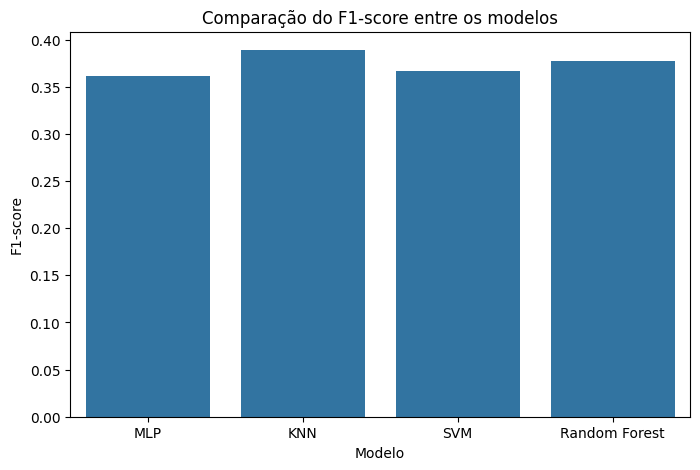

In [13]:
model_names = list(results.keys())
f1_scores = [results[m]['F1-score'] for m in model_names]

plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=f1_scores)
plt.title('Comparação do F1-score entre os modelos')
plt.ylabel('F1-score')
plt.xlabel('Modelo')
plt.show()

# 10. Validação cruzada


# Exemplo para Random Forest

In [14]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_pipe = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])
cv_scores = cross_val_score(rf_pipe, X, y, cv=cv, scoring='f1')
print(f"F1-score médio (Random Forest, 5-fold CV): {cv_scores.mean():.4f}")

F1-score médio (Random Forest, 5-fold CV): 0.3768


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results_cv = {}

for name, model in models.items():
    pipe = Pipeline([
        ('pre', preprocessor),
        ('clf', model)
    ])
    f1_scores = cross_val_score(pipe, X, y, cv=cv, scoring='f1')
    acc_scores = cross_val_score(pipe, X, y, cv=cv, scoring='accuracy')
    results_cv[name] = {
        'F1-score médio': np.mean(f1_scores),
        'F1-score std': np.std(f1_scores),
        'Acurácia média': np.mean(acc_scores),
        'Acurácia std': np.std(acc_scores),
        'F1-scores': f1_scores,
        'Acc-scores': acc_scores
    }
    print(f"{name}: F1-score médio = {np.mean(f1_scores):.4f}")

MLP: F1-score médio = 0.3499
KNN: F1-score médio = 0.3701


# 11. Salvando o arquivo CSV (pós-pré-processamento)

In [15]:
X_train_proc = preprocessor.fit_transform(X_train)
pd.DataFrame(X_train_proc).to_csv('bank_preprocessado.csv', index=False)